<a href="https://colab.research.google.com/github/gelgel5633/personal_project/blob/main/KR_Tabular_Playground_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 + 확인

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/competition/kaggle/Tabular Playground Series/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/competition/kaggle/Tabular Playground Series/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/competition/kaggle/Tabular Playground Series/sample_submission.csv")

In [ ]:
train_df.head(2)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


In [ ]:
test_df.head(2)

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started


In [ ]:
len(train_df)

70128

In [ ]:
print(len(test_df), len(submission))

17520 17520


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [ ]:
train_df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

# 전처리

- 예측하는 데에 방해가 되는 row_id 값은 삭제

In [ ]:
train_df.drop(["row_id"], axis = 1, inplace = True)
test_df.drop(["row_id"], axis = 1, inplace = True)

In [ ]:
train_df.head(2)

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


- 각 제품별 범주가 몇 개가 존재하는지 확인 필요

In [ ]:
for i in ["country", "store", "product"]:
    print(i, "unique_number {}". format(train_df[i].nunique()))

country unique_number 6
store unique_number 2
product unique_number 4


In [ ]:
print(train_df["country"].unique())
print(train_df["store"].unique())
print(train_df["product"].unique())

['Belgium' 'France' 'Germany' 'Italy' 'Poland' 'Spain']
['KaggleMart' 'KaggleRama']
['Kaggle Advanced Techniques' 'Kaggle Getting Started'
 'Kaggle Recipe Book' 'Kaggle for Kids: One Smart Goose']


In [ ]:
grouped_by_country = train_df.groupby("country")
grouped_by_country.count()

,date,store,product,num_sold
country,,,,
Belgium,11688,11688,11688,11688
France,11688,11688,11688,11688
Germany,11688,11688,11688,11688
Italy,11688,11688,11688,11688
Poland,11688,11688,11688,11688
Spain,11688,11688,11688,11688


>> - 국가별로 데이터의 크기가 동일함

In [ ]:
prod = ['Kaggle Advanced Techniques', 'Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']
def check_item_num(df, list):
    for i in list:
        print(i)
        tested = df["product"] == i
        print(len(df[tested]))

check_item_num(train_df, prod)

Kaggle Advanced Techniques
17532
Kaggle Getting Started
17532
Kaggle Recipe Book
17532
Kaggle for Kids: One Smart Goose
17532


In [ ]:
train_df.groupby("product").count()

,date,country,store,num_sold
product,,,,
Kaggle Advanced Techniques,17532,17532,17532,17532
Kaggle Getting Started,17532,17532,17532,17532
Kaggle Recipe Book,17532,17532,17532,17532
Kaggle for Kids: One Smart Goose,17532,17532,17532,17532


>> - 아이템별로도 데이터의 크기가 동일함

In [ ]:
train_df.groupby(["country", "product"]).count()

date  store  num_sold
country product                                                
Belgium Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922
France  Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922
Germany Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922
Italy   Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922
Poland  Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922
Spain   Kaggle Advanced Techniques        2922   2922      2922
        Kaggle Getting Started            2922   2922      2922
        Kaggle Recipe Book                2922   2922      2922
        Kaggle for Kids: One Smart Goose  2922   2922      2922

>> - 모든 곳에 동일한 크기의 데이터가 존재함

- 날짜를 object 타입에서 datetime으로 변경

In [ ]:
train_df["date"] = pd.to_datetime(train_df["date"])
test_df["date"] = pd.to_datetime(test_df["date"])

In [ ]:
train_df["year"] = train_df["date"].dt.year
train_df['month'] = train_df["date"].dt.month
train_df['day'] = train_df["date"].dt.day
train_df["day_of_year"] = train_df["date"].dt.dayofyear
train_df["quarter"] = train_df["date"].dt.quarter

test_df["year"] = test_df["date"].dt.year
test_df["month"] = test_df["date"].dt.month
test_df["day"] = test_df["date"].dt.day
test_df["day_of_year"] = test_df["date"].dt.dayofyear
test_df["quarter"] = test_df["date"].dt.quarter

In [ ]:
train_df.head(2)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,1


- 아래 시각화 자료 세 개(추세 확인용)는 다음 노트북에서 사용
https://www.kaggle.com/code/ehekatlact/tps2209-ridge-lgbm-eda-topdownapproach

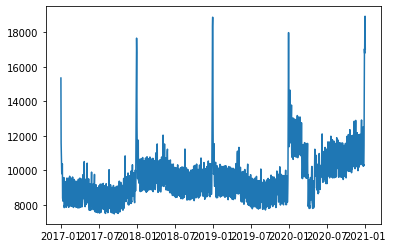

In [ ]:
date_groupby = train_df.groupby("date").sum().reset_index()
plt.plot(date_groupby["date"], date_groupby["num_sold"])

>> - 2020년 1월 경 추세가 바뀌고 있음

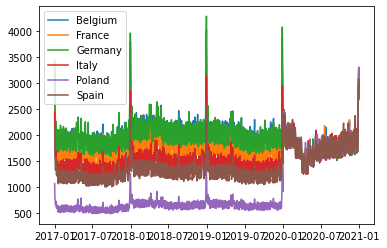

In [ ]:
for country in train_df["country"].unique():
    filtered_train = train_df[train_df["country"] == country]

    date_groupby = filtered_train.groupby("date").sum().reset_index()
    plt.plot(date_groupby["date"], date_groupby["num_sold"], label = country)
plt.legend()
plt.show()

>> - 2020년 1월 이후에는 국가별 차이가 거의 존재하지 않음

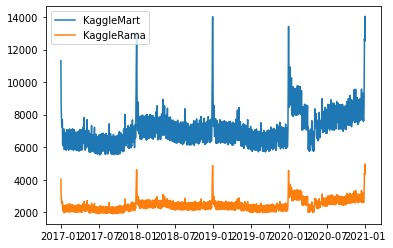

In [ ]:
for store in train_df["store"].unique():
    filtered_train = train_df[train_df["store"] == store]
    grouped_train = filtered_train.groupby("date").sum().reset_index()
    plt.plot(grouped_train["date"], grouped_train["num_sold"], label = store)
plt.legend()
plt.show()

>> - 원래는 점포별로 추세를 확인하지 않으려 했지만 비슷한 판매량을 가지고 있다면 예측에 방해가 될 것으로 판단하여 점포별로 확인해보았음
> - Mart에 비해 Rama가 더 낮은 판매량을 기록하고 있기에 어느정도 의미가 있는 것으로 보임

- 위의 국가들을 보고 각 국가별로 따로 휴일을 설정해야하나 고민했으나 인접한 국가여서 시차가 거의 나지 않는 것을 확인하였고 pandas weekday를 사용
- 원 핫 인코딩을 통해 분리한 이후 4,5,6(금, 토, 일)의 값 확인
- 선정이유 : 주말에는 대체적으로 사람들이 방문하는 경우가 많을 것이므로 

In [ ]:
train_df["weekday"]= train_df["date"].dt.weekday
test_df["weekday"] = test_df["date"].dt.weekday

In [ ]:
train_df.head(2)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter,weekday
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,1,6
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,1,6


- 위의 판매량을 보았을 때 7 ~ 10월은 판매량이 감소하고 11 ~ 6월은 증가하거나 유지하는 모습을 보임
- 7~10월을 0, 11월 ~6월을 1로 설정할 것임
- columns name은 is_nov_to_june

In [ ]:
train_df["is_nov_to_june"] = np.where((train_df["month"] == 11) | (train_df["month"] == 12) | (train_df["month"] == 1) | (train_df["month"] == 2) | (train_df["month"] == 3) | \
                                      (train_df["month"] == 4) | (train_df["month"] == 5) | (train_df["month"] == 6), 1, 0)
test_df["is_nov_to_june"] = np.where((test_df["month"] == 11) | (test_df["month"] == 12) | (test_df["month"] == 1) | (test_df["month"] == 2) | (test_df["month"] == 3) | \
                                      (test_df["month"] == 4) | (test_df["month"] == 5) | (test_df["month"] == 6), 1, 0)

- 요일별 판매량 확인

In [ ]:
check_days_sold = []
for i in range(7):
    temp_count = train_df["weekday"] == i
    temp_train = train_df[temp_count]
    sum_y = temp_train["num_sold"].sum()
    check_days_sold.append(sum_y)

In [ ]:
check_days_sold

[1846552, 1844408, 1839299, 1841588, 1923195, 2111944, 2218673]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


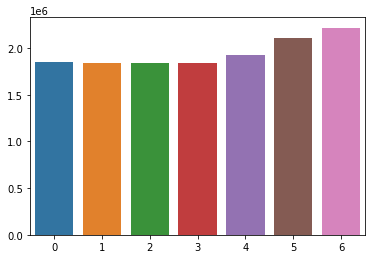

In [ ]:
sns.barplot([0,1,2,3,4,5,6], check_days_sold)

>> - 예상과 달리 금요일은 다른 평일과 비교했을 때 매출 금액이 크게 차이가 나지 않음
- 원인은 다음날이 휴무이지만 여전히 근무를 하는 것이 영향을 미치는 것으로 보임
- 토, 일요일에는 예상대로 평일보다 더 높은 매출이 발생함
>> - pandas weekday를 통해 주말에 더 높은 판매횟수를 보이므로 이 역시 중요한 변수로 판단

- 이를 인식할 수 있도록 주말인지 아닌지를 나타내는 is_holiday 컬럼 추가

In [ ]:
# np.where (조건문, 조건문이 맞았을 때, 틀렸을 때)
train_df["is_holiday"] = np.where((train_df["weekday"] == 5) | (train_df["weekday"] == 6), 1, 0)
test_df["is_holiday"] = np.where((test_df["weekday"] == 5) | (test_df["weekday"] == 6), 1, 0)

In [ ]:
train_df.head(2)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter,weekday,is_nov_to_june,is_holiday
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,1,6,1,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,1,6,1,1


- 2020년 이후로 추세가 바뀌고 있으므로 is_after_2020_01 컬럼을 추가

In [ ]:
train_df["is_after_2020_01"] = np.where((train_df["year"] >=2020), 1, 0)
test_df["is_after_2020_01"] = np.where((test_df["year"] >=2020), 1, 0)

In [ ]:
train_df.tail(2)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter,weekday,is_nov_to_june,is_holiday,is_after_2020_01
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31,366,4,3,1,0,1
70127,2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202,2020,12,31,366,4,3,1,0,1


- 공휴일을 제외하고 판매량이 많은 날이 토, 일요일이 아니어도 존재할 것임(연초, 연말)
- 다른 날과 판매량의 차이가 심하다면( or 토, 일요일과 판매량이 유사하다면) 특별일로 판단하여도 될 것임
- month, day를 기준으로 묶어보기

In [ ]:
special_day_sum = pd.DataFrame(train_df.groupby(["month", "day"])["num_sold"].sum())
special_day_sum

num_sold
month day          
1     1       51466
      2       46393
      3       43669
      4       43482
      5       45914
...             ...
12    27      52424
      28      60401
      29      71004
      30      70258
      31      61797

[366 rows x 1 columns]

In [ ]:
special_day_df = special_day_sum.sort_values("num_sold", ascending = False)
special_day_df

num_sold
month day          
12    29      71004
      30      70258
      31      61797
      28      60401
      27      52424
...             ...
10    2       33960
4     3       33928
7     31      33913
4     10      33558
2     29      12754

[366 rows x 1 columns]

>> - 12월 말에 주말을 포함하고도(이틀이 주말이라는 가정 하에) 가장 높은 판매량을 달성하였다
- 추가적으로 탐색하기 위해 히스토그램 그려보기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


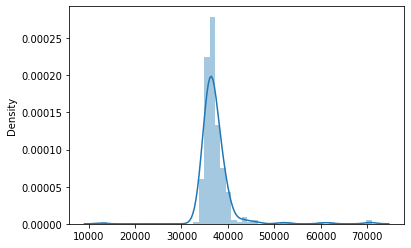

In [ ]:
sns.distplot(special_day_df)

In [ ]:
special_day_df.describe()

,num_sold
count,366.000000
mean,37228.576503
std,3960.229675
min,12754.000000
25%,35590.250000
50%,36588.000000
75%,37952.500000
max,71004.000000


### 많이 팔린 것 분류 -> 평균 + 1std

평균 +- 1표준편차 = 68.3%범위 33268 ~ 41188 -> 41189 이상 값 확인

In [ ]:
sspecial = special_day_df[special_day_df["num_sold"]>=41189]
len(sspecial)

16

In [ ]:
sspecial

num_sold
month day          
12    29      71004
      30      70258
      31      61797
      28      60401
      27      52424
1     1       51466
      2       46393
      5       45914
      6       45069
      3       43669
      4       43482
12    26      43391
1     7       43330
5     5       42389
      6       41811
1     12      41785

In [ ]:
temp_train = train_df[(train_df["month"]==5) & (train_df["day"]==5)]
temp_train.head(1)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter,weekday,is_nov_to_june,is_holiday,is_after_2020_01
5952,2017-05-05,Belgium,KaggleMart,Kaggle Advanced Techniques,560,2017,5,5,125,2,4,1,0,0


day_of_year 기준
- 1월 1~7일, 12일 (1 2 3 4 5 6 7 12)
- 5월 5일 6일(125 126)
- 12월 26 27 28 29 30 31 (361 362 363 364 365 366)

In [ ]:
train_df["is_special_day_1std"] = np.where((train_df["day_of_year"] == 1) | (train_df["day_of_year"] == 2) | (train_df["day_of_year"] == 3) | (train_df["day_of_year"] == 4) | (train_df["day_of_year"] == 5) | \
                                      (train_df["day_of_year"] == 6) | (train_df["day_of_year"] == 7) | (train_df["day_of_year"] == 12) \
                                       | (train_df["day_of_year"] == 125) | (train_df["day_of_year"] == 126) | \
                                      (train_df["day_of_year"] == 361) | (train_df["day_of_year"] == 362) | (train_df["day_of_year"] == 363) | (train_df["day_of_year"] == 364) | (train_df["day_of_year"] == 365) | (train_df["day_of_year"] == 366), 1, 0)

test_df["is_special_day_1std"] = np.where((test_df["day_of_year"] == 1) | (test_df["day_of_year"] == 2) | (test_df["day_of_year"] == 3) | (test_df["day_of_year"] == 4) | (test_df["day_of_year"] == 5) | \
                                      (test_df["day_of_year"] == 6) | (test_df["day_of_year"] == 7) | (test_df["day_of_year"] == 12) \
                                       | (test_df["day_of_year"] == 125) | (test_df["day_of_year"] == 126) | \
                                      (test_df["day_of_year"] == 361) | (test_df["day_of_year"] == 362) | (test_df["day_of_year"] == 363) | (test_df["day_of_year"] == 364) | (test_df["day_of_year"] == 365) | (test_df["day_of_year"] == 366), 1, 0)

### 많이 팔린 것 분류 -> 평균 + 2std

- 첨도가 크지만 95% 신뢰구간 기준 -> 평균 +- 2표준편차 ->  29,308 ~ 45,148의 값을 가짐
- 이 이상 매출에 영향을 끼친 달을 확인하기 위해 45,149 이상 값들만 출력

In [ ]:
sspecial = special_day_df[special_day_df["num_sold"]>=45149]
len(sspecial)

8

In [ ]:
sspecial

num_sold
month day          
12    29      71004
      30      70258
      31      61797
      28      60401
      27      52424
1     1       51466
      2       46393
      5       45914

- 1월 1, 2, 5일(1 2 5)// 12월 27, 28, 29, 30, 31(362 363 364 365 366) 일에 가장 많은 판매량이 보임
- is_special_day_2std 컬럼 추가

In [ ]:
train_df["is_special_day_2std"] = np.where((train_df["day_of_year"] == 1) | (train_df["day_of_year"] == 2) | (train_df["day_of_year"] == 5) | \
                                      (train_df["day_of_year"] == 362) | (train_df["day_of_year"] == 363) | (train_df["day_of_year"] == 364) | \
                                      (train_df["day_of_year"] == 365) | (train_df["day_of_year"] == 366), 1, 0)

test_df["is_special_day_2std"] = np.where((test_df["day_of_year"] == 1) | (test_df["day_of_year"] == 2) | (test_df["day_of_year"] == 5) | \
                                      (test_df["day_of_year"] == 362) | (test_df["day_of_year"] == 363) | (test_df["day_of_year"] == 364) | \
                                      (test_df["day_of_year"] == 365) | (test_df["day_of_year"] == 366), 1, 0)

In [ ]:
train_df.head(2)

,date,country,store,product,num_sold,year,month,day,day_of_year,quarter,weekday,is_nov_to_june,is_holiday,is_after_2020_01,is_special_day_1std,is_special_day_2std
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,1,6,1,1,0,1,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,1,6,1,1,0,1,1


### 적게 팔린 것 분류 -> 평균 - 1std

In [ ]:
sspecial = special_day_df[special_day_df["num_sold"]<=33267]
print(len(sspecial))
sspecial

1


,,num_sold
month,day,
2,29,12754


>> - 2월 29일은 4년에 한 번이므로 판매량이 적은 것은 당연한 현상
- 낮은 판매량 중에서 이상치라고 할만한 것이 2월 29일만 해당함
- 대부분의 값은 0으로 채워질 것이기에 의미없는 변수가 될 것이 예상됨
- 컬럼을 추가하지 않는 방향으로 진행

- year, month, day로 할당했으므로 "date" column은  삭제 

### drop columns

In [ ]:
train_df.drop("date", axis = 1, inplace = True)
test_df.drop("date", axis = 1, inplace = True)

- 예측해야 하는 값인 num_sold 를 y로 할당해서 제거

In [ ]:
y = train_df["num_sold"]
train_df.drop(["num_sold"], axis = 1, inplace = True)

- object를 학습시킬 때 넣을 수 없으므로 원-핫 인코딩으로 변환

### one-hot encoding

In [ ]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
train_df.head(2)

,year,month,day,day_of_year,quarter,weekday,is_nov_to_june,is_holiday,is_after_2020_01,is_special_day_1std,...,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,2017,1,1,1,1,6,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,2017,1,1,1,1,6,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0


- weekday, quarter가 변환되지 않아서 타입 확인

In [ ]:
train_df["weekday"].dtype, train_df["quarter"].dtype

(dtype('int64'), dtype('int64'))

>> - int형으로 지정되어있어서 변환이 되지 않은 것으로 보임. 문자열로 치환한 후 get_dummies를 사용

In [ ]:
train_df["weekday"] = train_df["weekday"].astype(object)
test_df["weekday"] = test_df["weekday"].astype(object)

train_df["quarter"] = train_df["quarter"].astype(object)
test_df["quarter"] = test_df["quarter"].astype(object)

print(train_df["weekday"].dtype, train_df["quarter"].dtype)

object object


>> - 변형 완료됨. 다시 원 핫 인코딩 수행

In [ ]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
train_df.head(2)

,year,month,day,day_of_year,is_nov_to_june,is_holiday,is_after_2020_01,is_special_day_1std,is_special_day_2std,country_Belgium,...,quarter_2,quarter_3,quarter_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2017,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2017,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


> - 정상적으로 원 핫 인코딩이 수행되었음

### 목적변수 분포 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


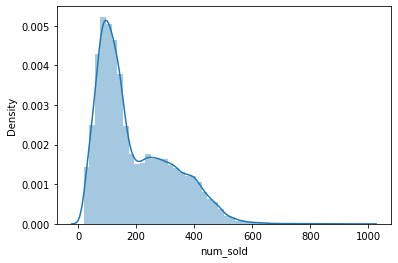

In [ ]:
sns.distplot(y)

>> - 대체로 값이 150을 전후로 분포되어 있으나, 정규분포와 거리가 먼 모습을 보임. log를 씌워줌으로써 해결

In [ ]:
log_y = np.log1p(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


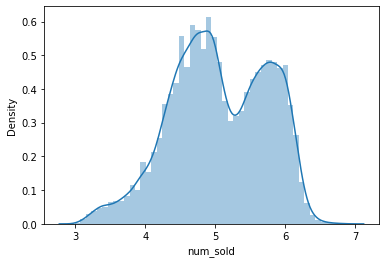

In [ ]:
sns.distplot(log_y)

>> - 바라던 모양은 아니지만 이전보다 훨씬 나은 모습을 보임
- 나중에 예측값을 다시 np.expm1로 변형해주어야함

# 학습

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [ ]:
from lightgbm import LGBMRegressor as lgbm
from catboost import CatBoostRegressor as cat
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# # 랜덤 그리드 서치를 하지 않는다면 실행시킬 필요가 없는 코드
# 실행시키고 싶으시면 주석을 해제해주세요
# LGBM = lgbm(n_estimators = 801)
# CATEGORI = cat(n_estimators = 801, metric_period=800)
# RF = RandomForestRegressor(n_estimators = 801)
# XGB = xgb.XGBRegressor(n_estimators = 801, objective="reg:squarederror")

In [ ]:
# # RandomizedSearchCV -> catboost, xgboost는 시간이 매우 오래 걸리므로 주의 (2시간 30분 정도)

# # 사용하지 않을 경우 LGBM2, CATEGORI2, RF2, XGB2 선언하는 셀로 넘어갈 것

# from sklearn.model_selection import RandomizedSearchCV

# lgbm_distribution = {
#     "max_depth" : range(5,16),
#     "num_leaves" : range(8,25)}

# cat_distribution = {"max_depth" : range(5,16),
#                     "learning_rate" : [0.001, 0.005, 0.01]}

# rf_distribution = {"bootstrap" : [True, False],
#                    "max_depth" : range(5,16),
#                    "max_features" : range(4, 8)}

# xgb_distribution = {"max_depth" : range(5,16),
#                     "alpha" : [0, 0.1, 0.01] }


# rs_lgbm = RandomizedSearchCV(LGBM, lgbm_distribution)
# rs_cat = RandomizedSearchCV(CATEGORI, cat_distribution)
# rs_rf = RandomizedSearchCV(RF, rf_distribution)
# rs_xgb = RandomizedSearchCV(XGB, xgb_distribution)

# rs_lgbm.fit(train_df, log_y)
# rs_cat.fit(train_df, log_y)
# rs_rf.fit(train_df, log_y)
# rs_xgb.fit(train_df, log_y)

# print("lgbm 최적 : ", rs_lgbm.best_params_)
# print("cat 최적 : ", rs_cat.best_params_)
# print("rf 최적 : ", rs_rf.best_params_)
# print("xgb 최적 : ", rs_xgb.best_params_)

### 그리드서치를 통해 얻은 최적 하이퍼 파라미터

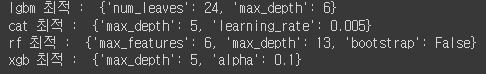

- 랜덤서치를 통해 얻은 최적 하이퍼 파라미터로 바로 예측이 가능함

In [ ]:
# 랜덤 서치를 이용했을 때 바로 예측값을 뽑아내고 싶은 경우에 사용
# 사용하지 않을 경우 다음 코드셀로 넘어갈 것

# 위의 랜덤서치를 사용했을 때 아래의 코드로 predict 추출 가능
# pred1 = np.expm1(rs_lgbm.best_estimator_.predict(test_df))
# pred2 = np.expm1(rs_cat.best_estimator_.predict(test_df))
# pred3 = np.expm1(rs_rf.best_estimator_.predict(test_df))
# pred4 = np.expm1(rs_rf.best_estimator_.predict(test_df))

# all_pred = pred1 + pred2 + pred3 + pred4
# final_pred = all_pred/4

# submission['num_sold']= final_pred
# submission=submission.round({"num_sold":0})
# display(submission)
# submission.to_csv('/all_801_7.csv', index=False)

- 아래 코드에서 하이퍼파라미터 재설정

In [ ]:
# RandomsearchCV 사용하지 않을 때 사용하는 코드

LGBM2 = lgbm(n_estimators = 801, num_leaves = 24, max_depth = 6)

CATEGORI2 = cat(n_estimators = 801, metric_period=800, max_depth = 5, learning_rate = 0.005)

RF2 = RandomForestRegressor(n_estimators = 801, max_features = 6, max_depth = 13, bootstrap = False)

XGB2 = xgb.XGBRegressor(n_estimators = 801, objective="reg:squarederror", max_depth = 5, alpha = 0.1)


LGBM2.fit(train_df, log_y)
CATEGORI2.fit(train_df, log_y)
RF2.fit(train_df, log_y)
XGB2.fit(train_df, log_y)


# 교차검증 필요할 경우 아래 주석 해제

from sklearn.model_selection import cross_val_score as cs

lgbm_cs = cs(LGBM2, train_df, log_y, cv = 4)
categori_cs = cs(CATEGORI2, train_df, log_y, cv = 4)
rf_cs = cs(RF2, train_df, log_y, cv = 4)
xgb_cs = cs(XGB2, train_df, log_y, cv = 4)

print(lgbm_cs.mean())
print(categori_cs.mean())
print(rf_cs.mean())
print(xgb_cs.mean())

0:	learn: 0.6869562	total: 64.9ms	remaining: 51.9s
800:	learn: 0.1285233	total: 18.6s	remaining: 0us
0:	learn: 0.6755396	total: 7.6ms	remaining: 6.08s
800:	learn: 0.1257497	total: 4.86s	remaining: 0us
0:	learn: 0.6801283	total: 7.01ms	remaining: 5.61s
800:	learn: 0.1251100	total: 4.9s	remaining: 0us
0:	learn: 0.6838375	total: 6.48ms	remaining: 5.18s
800:	learn: 0.1292726	total: 4.94s	remaining: 0us
0:	learn: 0.7045476	total: 8.19ms	remaining: 6.55s
800:	learn: 0.1145184	total: 5.16s	remaining: 0us
0.8408853864035535
0.8276798787202524
0.8444481894403179
0.7499886262509493


### 교차검증 결과

>> - 검증 결과 네 가지의 모델 모두 일정한 성능(74%이상)을 가지고 있음
- 네 가지의 모델을 앙상블하여 결과 예측

# additional_process

- 위의 시각화 자료를 봤을 때 2020년 1월부터 추세가 바뀌는 것을 확인 가능함
- 2020-01-01 의 전후를 기준으로 평균이 얼마나 달라졌는지 확인

In [ ]:
# 2020-01-01의 첫 인덱스가 어디인지?
train_df[(train_df["year"] == 2020) & (train_df["month"] == 1) & (train_df["day"] == 1)].head()

,year,month,day,day_of_year,is_nov_to_june,is_holiday,is_after_2020_01,is_special_day_1std,is_special_day_2std,country_Belgium,...,quarter_2,quarter_3,quarter_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
52560,2020,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
52561,2020,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
52562,2020,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
52563,2020,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
52564,2020,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
len(train_df)

70128

>> - 전체 70128행 중 2020년 1월 이후의 인덱스는 52560부터 시작
- 슬라이싱을 할 때 [:52560]// [52560:]의 방법으로 2020년 1월 전 후로 나눌 수 있음

In [ ]:
before_2020 = y[:52560]
after_2020 = y[52560:]

In [ ]:
len(before_2020), len(after_2020)

(52560, 17568)

In [ ]:
before_2020.sum()/52560, after_2020.sum()/17568

(185.89166666666668, 219.44404599271402)

>> - 평균에 차이가 있는 것이 확인됨

In [ ]:
a = after_2020.sum()/17568 - before_2020.sum()/52560
a

33.552379326047344

In [ ]:
correction = a/6/2 # ((2020 after.mean) - (2020 before.mean)) / country / martnumber

In [ ]:
correction

2.7960316105039453

>> - 추세가 상승세로 바뀌었고, 추세가 바뀐 이후의 데이터가 부족하기 때문에 이전 데이터의 영향을 많이 받을 것으로 보임
- 모델의 예측값에서 일괄적으로 +2.7를 더해줄 것임(위의 주석 참고)

# voting 제출

In [ ]:
# from sklearn.ensemble import VotingRegressor
# voting = VotingRegressor([("lgbm", LGBM2), ("categori", CATEGORI2), ("rf", RF2), ("xgb", XGB2)])
# voting.fit(train_df, log_y)

# preds = voting.predict(test_df)

# #이전에 log를 취했던 y값을 원래대로 돌리기 위해 expm1을 사용
# preds = np.expm1(preds)

# preds += correction
# submission['num_sold']= preds
# submission=submission.round({"num_sold":0})
# display(submission)
# submission.to_csv('/voting_grid_search.csv', index=False)

# 예측 제출

In [ ]:
pred1 = np.expm1(LGBM2.predict(test_df))
pred2 = np.expm1(CATEGORI2.predict(test_df))
pred3 = np.expm1(RF2.predict(test_df))
pred4 = np.expm1(XGB2.predict(test_df))


all_pred = pred1 + pred2 + pred3 + pred4
final_pred = all_pred/4

final_pred += correction
submission['num_sold']= final_pred
submission=submission.round({"num_sold":0})
display(submission)
submission.to_csv('/final.csv', index=False)

,row_id,num_sold
0,70128,488.0
1,70129,383.0
2,70130,327.0
3,70131,527.0
4,70132,170.0
...,...,...
17515,87643,613.0
17516,87644,209.0
17517,87645,166.0
17518,87646,139.0
